0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
finish:  0:00:05.941963


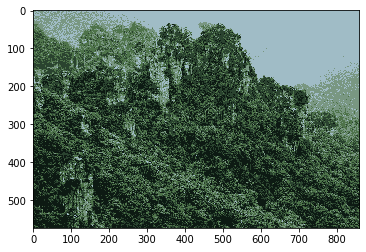

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
from PIL import Image
import datetime

def classify(centroids,img_1d):
    storage,label=[],[]
    for i in range(len(centroids)):
        storage.append(np.sum((img_1d-centroids[i])**2, axis=1))
    storage=np.array(storage)
    label=(np.argmin(storage, axis=0)).flatten()
    return label

def initcentroids(mode, img_1d, k_clusters):
    centroids=[]
    for i in range(k_clusters):
        if mode=='in_pixels':
            centroids.append(img_1d[random.randint(img_1d.shape[0])])
        else:
            centroids.append([random.randint(255),random.randint(255),random.randint(255)])
    return np.array(centroids, dtype='i')

def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    centroids=initcentroids(init_centroids, img_1d, k_clusters)
    label=classify(centroids,img_1d)
    while(max_iter):
        print(1000-max_iter)
        blist=label
        for i in range(len(centroids)):
            centroids[i]=np.mean(img_1d[label==i,:],axis=0)
        label=classify(centroids,img_1d)
        c = (np.array(blist) == np.array(label))
        if False not in c:
            return [centroids,label]
        max_iter-=1
    return [centroids,label]


time3 = datetime.datetime.now()
k_clusters = 5
max_iter = 1000
picture=np.array(Image.open(r'D:\hinh1.jpg'))
height=picture.shape[0]
width=picture.shape[1]

picture=picture.reshape(height*width,3) #convert to 1D array
[centroids,label]=kmeans(picture, k_clusters, max_iter, 'random')

for i in range(picture.shape[0]):
    picture[i]=centroids[label[i]]
picture=picture.reshape(height,width,3)

time4 = datetime.datetime.now()
print("finish: ", time4-time3)

plt.imshow(picture)